## Question 4 Appendix: Calculations

***

### For the following questions use at least 25 year's worth of data from any reasonable combination of atmosphere reanalyses, ocean state estimates, ocean hydrography products, or dedicated air-sea heat flux products. Show all work.

***

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
from pathlib import Path
import cmocean
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import seaborn as sns

#### Datasets used:

ECCO Ocean and Sea-Ice Surface Heat Fluxes - Monthly Mean 0.5 Degree (Version 4 Release 4) <br>
https://podaac.jpl.nasa.gov/dataset/ECCO_L4_HEAT_FLUX_05DEG_MONTHLY_V4R4

ECCO Ocean Temperature and Salinity - Monthly Mean 0.5 Degree (Version 4 Release 4) <br>
https://podaac.jpl.nasa.gov/dataset/ECCO_L4_TEMP_SALINITY_05DEG_MONTHLY_V4R4

ECCO Geometry Parameters for the 0.5 degree Lat-Lon Model Grid (Version 4 Release 4) <br>
https://podaac.jpl.nasa.gov/dataset/ECCO_L4_GEOMETRY_05DEG_V4R4?ids=&values=&search=ecco%20grid%20lat&provider=POCLOUD

*Time Span of 26 years: 1992-Jan-01 to 2018-Jan-01*

#### Import ECCO data

Open and combine all NetCDF files together using the `xarray.open_mfdataset` function:

In [2]:
# define root directory for location of all downloaded NetCDF files
root_dir = Path('../data/ECCO_V4r4_PODAAC')

# define the directory where the files specific to desired dataset are stored
nc_heat_dir = root_dir / "ECCO_L4_HEAT_FLUX_05DEG_MONTHLY_V4R4"
nc_temp_salt_dir = root_dir / "ECCO_L4_TEMP_SALINITY_05DEG_MONTHLY_V4R4"

In [3]:
# get all files in each folder for import
heat_nc_files = list(nc_heat_dir.glob('*nc'))
temp_salt_nc_files = list(nc_temp_salt_dir.glob('*nc'))

In [4]:
# import 26 years of ecco temperature data
temp_salt_ds = xr.open_mfdataset(temp_salt_nc_files, parallel=True, data_vars='minimal',\
                                coords='minimal', compat='override')

temp_salt_ds

<xarray.Dataset>
Dimensions:         (time: 312, Z: 50, latitude: 360, longitude: 720, nv: 2)
Coordinates:
  * time            (time) datetime64[ns] 1992-01-16T18:00:00 ... 2017-12-16T...
  * Z               (Z) float32 -5.0 -15.0 -25.0 ... -5.461e+03 -5.906e+03
  * latitude        (latitude) float32 -89.75 -89.25 -88.75 ... 89.25 89.75
  * longitude       (longitude) float32 -179.8 -179.2 -178.8 ... 179.2 179.8
    time_bnds       (time, nv) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    latitude_bnds   (latitude, nv) float32 dask.array<chunksize=(360, 2), meta=np.ndarray>
    longitude_bnds  (longitude, nv) float32 dask.array<chunksize=(720, 2), meta=np.ndarray>
    Z_bnds          (Z, nv) float32 dask.array<chunksize=(50, 2), meta=np.ndarray>
Dimensions without coordinates: nv
Data variables:
    THETA           (time, Z, latitude, longitude) float32 dask.array<chunksize=(1, 50, 360, 720), meta=np.ndarray>
    SALT            (time, Z, latitude, longitude) float32 dask.array<chunksize=(1, 50, 360, 720), meta=np.ndarray>
Attributes: (12/62)
    acknowledgement:                 This research was carried out by the Jet...
    author:                          Ian Fenty and Ou Wang
    cdm_data_type:                   Grid
    comment:                         Fields provided on a regular lat-lon gri...
    Conventions:                     CF-1.8, ACDD-1.3
    coordinates_comment:             Note: the global 'coordinates' attribute...
    ...                              ...
    time_coverage_duration:          P1M
    time_coverage_end:               1992-02-01T00:00:00
    time_coverage_resolution:        P1M
    time_coverage_start:             1992-01-01T12:00:00
    title:                           ECCO Ocean Temperature and Salinity - Mo...
    uuid:                            7e05edde-4159-11eb-9ce1-0cc47a3f47f1

In [5]:
# import 26 years of ecco heat flux data
heat_ds = xr.open_mfdataset(heat_nc_files, parallel=True, data_vars='minimal',\
                            coords='minimal', compat='override')

heat_ds

<xarray.Dataset>
Dimensions:         (time: 312, latitude: 360, longitude: 720, nv: 2)
Coordinates:
  * time            (time) datetime64[ns] 1992-01-16T18:00:00 ... 2017-12-16T...
  * latitude        (latitude) float32 -89.75 -89.25 -88.75 ... 89.25 89.75
  * longitude       (longitude) float32 -179.8 -179.2 -178.8 ... 179.2 179.8
    time_bnds       (time, nv) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    latitude_bnds   (latitude, nv) float32 dask.array<chunksize=(360, 2), meta=np.ndarray>
    longitude_bnds  (longitude, nv) float32 dask.array<chunksize=(720, 2), meta=np.ndarray>
Dimensions without coordinates: nv
Data variables:
    EXFhl           (time, latitude, longitude) float32 dask.array<chunksize=(1, 360, 720), meta=np.ndarray>
    EXFhs           (time, latitude, longitude) float32 dask.array<chunksize=(1, 360, 720), meta=np.ndarray>
    EXFlwdn         (time, latitude, longitude) float32 dask.array<chunksize=(1, 360, 720), meta=np.ndarray>
    EXFswdn         (time, latitude, longitude) float32 dask.array<chunksize=(1, 360, 720), meta=np.ndarray>
    EXFqnet         (time, latitude, longitude) float32 dask.array<chunksize=(1, 360, 720), meta=np.ndarray>
    oceQnet         (time, latitude, longitude) float32 dask.array<chunksize=(1, 360, 720), meta=np.ndarray>
    SIatmQnt        (time, latitude, longitude) float32 dask.array<chunksize=(1, 360, 720), meta=np.ndarray>
    TFLUX           (time, latitude, longitude) float32 dask.array<chunksize=(1, 360, 720), meta=np.ndarray>
    EXFswnet        (time, latitude, longitude) float32 dask.array<chunksize=(1, 360, 720), meta=np.ndarray>
    EXFlwnet        (time, latitude, longitude) float32 dask.array<chunksize=(1, 360, 720), meta=np.ndarray>
    oceQsw          (time, latitude, longitude) float32 dask.array<chunksize=(1, 360, 720), meta=np.ndarray>
    SIaaflux        (time, latitude, longitude) float32 dask.array<chunksize=(1, 360, 720), meta=np.ndarray>
Attributes: (12/57)
    acknowledgement:              This research was carried out by the Jet Pr...
    author:                       Ian Fenty and Ou Wang
    cdm_data_type:                Grid
    comment:                      Fields provided on a regular lat-lon grid. ...
    Conventions:                  CF-1.8, ACDD-1.3
    coordinates_comment:          Note: the global 'coordinates' attribute de...
    ...                           ...
    time_coverage_duration:       P1M
    time_coverage_end:            1992-02-01T00:00:00
    time_coverage_resolution:     P1M
    time_coverage_start:          1992-01-01T12:00:00
    title:                        ECCO Ocean and Sea-Ice Surface Heat Fluxes ...
    uuid:                         73ea7d5c-4158-11eb-8d61-0cc47a3f812d

In [6]:
# import the geometry data file that provides area and volume information for grid cells
geometry_ds = xr.open_dataset('../data/ECCO_V4r4_PODAAC/ECCO_L4_GEOMETRY_05DEG_V4R4/GRID_GEOMETRY_ECCO_V4r4_latlon_0p50deg.nc')
geometry_ds

<xarray.Dataset>
Dimensions:         (Z: 50, latitude: 360, longitude: 720, nv: 2)
Coordinates:
  * Z               (Z) float32 -5.0 -15.0 -25.0 ... -5.461e+03 -5.906e+03
  * latitude        (latitude) float32 -89.75 -89.25 -88.75 ... 89.25 89.75
  * longitude       (longitude) float32 -179.8 -179.2 -178.8 ... 179.2 179.8
    latitude_bnds   (latitude, nv) float32 ...
    longitude_bnds  (longitude, nv) float32 ...
    Z_bnds          (Z, nv) float32 ...
Dimensions without coordinates: nv
Data variables:
    hFacC           (Z, latitude, longitude) float64 ...
    Depth           (latitude, longitude) float64 ...
    area            (latitude, longitude) float64 ...
    drF             (Z) float32 ...
    maskC           (Z, latitude, longitude) bool ...
Attributes: (12/57)
    acknowledgement:                 This research was carried out by the Jet...
    author:                          Ian Fenty and Ou Wang
    cdm_data_type:                   Grid
    comment:                         Fields provided on a regular lat-lon gri...
    Conventions:                     CF-1.8, ACDD-1.3
    coordinates_comment:             Note: the global 'coordinates' attribute...
    ...                              ...
    references:                      ECCO Consortium, Fukumori, I., Wang, O.,...
    source:                          The ECCO V4r4 state estimate was produce...
    standard_name_vocabulary:        NetCDF Climate and Forecast (CF) Metadat...
    summary:                         This dataset provides geometric paramete...
    title:                           ECCO Geometry Parameters for the 0.5 deg...
    uuid:                            b4795c62-86e5-11eb-9c5f-f8f21e2ee3e0

### 3a. Calculate the monthly and annual climatologies of net air-sea heat flux [Watts per square meter] over the subpolar gyre.

#### Create mask for subpolar gyre region

In [7]:
# pull out Depth from geometry file to use for creating the mask
ecco_depth = geometry_ds.Depth

In [8]:
# meshgrid for longitude and latitude 1D arrays
data_x_mg, data_y_mg = np.meshgrid(ecco_depth.longitude,ecco_depth.latitude)

In [9]:
# create mask of subpolar gyre using 2000 m contour north of 55 deg.
# the last two logical statements remove small boxes from the desired region
gyre_mask = np.where(ecco_depth > 2000, 1, np.nan)*np.where(np.logical_and(data_y_mg > 55, data_y_mg < 70), 1, np.nan)*\
            np.where(data_x_mg > -60, 1, np.nan)*np.where(data_x_mg < -29, 1, np.nan)*\
            np.where(np.logical_and(data_y_mg < 58.5, data_x_mg > -34), np.nan, 1)*\
            np.where(np.logical_and(data_y_mg < 55.5, data_x_mg > -35), np.nan, 1)

In [10]:
# multiply ecco heat flux by mask to isolate data for the subpolar gyre 
EXFqnet_gyre = heat_ds.EXFqnet*gyre_mask

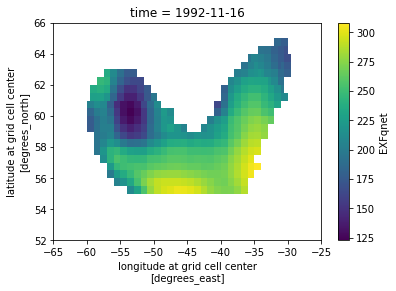

In [11]:
# sanity check plot to make sure the mask worked
EXFqnet_gyre.isel(time=10).plot()
plt.xlim(-65,-25)
plt.ylim(52,66);

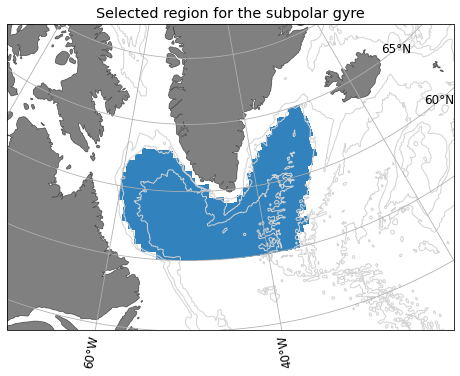

In [12]:
# Plot region selected for analysis
plt.rcParams['font.size'] = 12
fig = plt.figure(figsize=[8,10])

ax1=plt.subplot(1,1,1, projection=ccrs.NorthPolarStereo(central_longitude=-50))
ax1.set_extent([-70, -20, 50, 70], ccrs.PlateCarree()) # Limit the map extent
ax1.add_feature(cfeature.COASTLINE, edgecolor='k',linewidth=0.2)
ax1.add_feature(cfeature.LAND, color='gray')
bathym = cfeature.NaturalEarthFeature(name='bathymetry_J_1000', scale='10m', category='physical')
ax1.add_feature(bathym, facecolor='none', edgecolor='lightgray')
bathym = cfeature.NaturalEarthFeature(name='bathymetry_I_2000', scale='10m', category='physical')
ax1.add_feature(bathym, facecolor='none', edgecolor='lightgray')
bathym = cfeature.NaturalEarthFeature(name='bathymetry_H_3000', scale='10m', category='physical')
ax1.add_feature(bathym, facecolor='none', edgecolor='lightgray', label=True)

gl = ax1.gridlines(draw_labels=True)

gl.top_labels=False

data_cartopy_crs = ccrs.PlateCarree()
EXFqnet_gyre.isel(time=100).plot(ax=ax1,transform=ccrs.PlateCarree(),cmap='tab20c',vmin= -1, vmax=1,add_colorbar=False)
                         
ax1.set_title("Selected region for the subpolar gyre");

#### Calculate and plot monthly mean air-sea heat flux over 26 year time series

Variables in ECCO heat dataset to consider:
- `EXFqnet`: Open ocean net air-sea heat flux. Net air-sea heat flux (turbulent and radiative) per unit area of open water (not covered by sea-ice). Note: net upward heat flux over open water, calculated as EXFlwnet+EXFswnet-EXFlh-EXFhs.

- `oceQnet`: Net heat flux into the ocean surface. Net heat flux into the ocean surface from all processes: air-sea turbulent and radiative fluxes and turbulent and conductive fluxes between the ocean and sea-ice and snow. Note: oceQnet does not include the change in ocean heat content due to changing ocean ocean mass (oceFWflx). Mass fluxes from evaporation, precipitation, and runoff (EXFempmr) happen at the same temperature as the ocean surface temperature. Consequently, EmPmR does not change ocean surface temperature. Conversely, mass fluxes due to sea-ice thickening/thinning and snow melt in the model are assumed to happen at a fixed 0C. Consequently, mass fluxes due to phase changes between seawater and sea-ice and snow induce a heat flux when the ocean surface temperaure is not 0C. The variable TFLUX does include the change in ocean heat content due to changing ocean mass.

- `SIatmQnt`: Net upward heat flux to the atmosphere. Net upward heat flux to the atmosphere across open water and sea-ice or snow surfaces. Note: nonzero SIatmQnt may not be associated with a change in ocean potential temperature due to sea-ice growth or melting. To calculate total ocean heat content changes use the variable TFLUX which also accounts for changing ocean mass (e.g. oceFWflx).

- `TFLUX`: Rate of change of ocean heat content per m2 accounting for mass fluxes. The rate of change of ocean heat content due to heat fluxes across the liquid surface and the addition or removal of mass. . Note: the global area integral of TFLUX and geothermal flux (geothermalFlux.bin) matches the time-derivative of ocean heat content (J/s). Unlike oceQnet, TFLUX includes the contribution to the ocean heat content from changing ocean mass (e.g. from oceFWflx).

We will use EXFqnet because we are considering net air-sea heat fluxes irrespective of the presence of sea ice.

#### Calculate the area-weighted mean net air-sea heat-flux

##### Option 1: Use area from geometry dataset

In [13]:
# To calculate the area-weighted mean net heat-flux, we need to get the total area over the subpolar gyre region
area_gyre = geometry_ds.area*gyre_mask
area_gyre_total = area_gyre.sum(['latitude','longitude'])

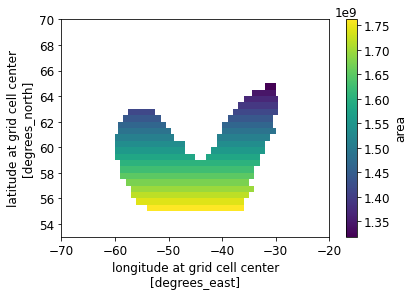

In [14]:
# sanity check plot (area decreases with increasing latitude)
area_gyre.sel(longitude=slice(-70,-20),latitude=slice(53,70)).plot();

In [15]:
# heat flux weighted by grid-cell area
EXFqnet_gyre_mean_weighted = (EXFqnet_gyre*area_gyre).sum(dim=["latitude","longitude"])/area_gyre_total

# now get the mean for each month from 1992-2017
EXFqnet_gyre_mean_month_weighted = EXFqnet_gyre_mean_weighted.groupby("time.month").mean(dim=["time"])

In [16]:
# For comparison, calculate unweighted monthly average
EXFqnet_gyre_mean_month_unweighted = EXFqnet_gyre.groupby("time.month").mean(dim=['time','latitude','longitude'])

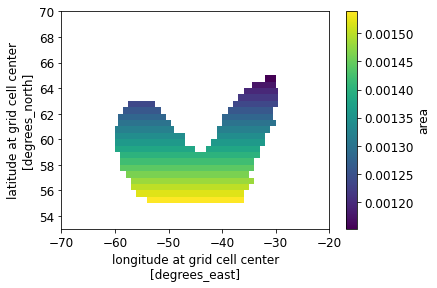

In [17]:
# look at weights across subpolar gyre to get a sense of how different unweighted vs. weighted averages are
(area_gyre/area_gyre_total).sel(longitude=slice(-70,-20),latitude=slice(53,70)).plot();

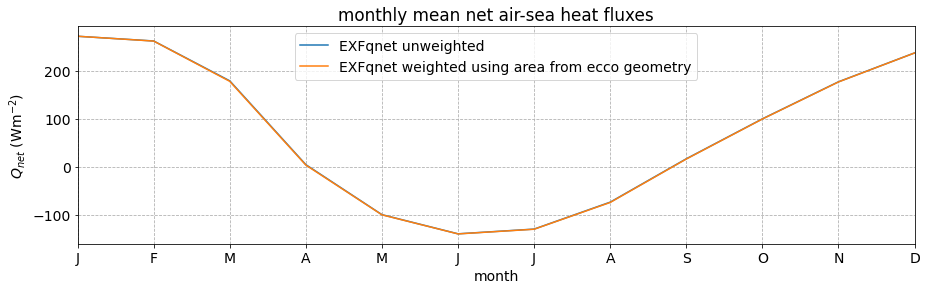

In [18]:
plt.rcParams['font.size'] = '14'
plt.figure(figsize=[15,4])
EXFqnet_gyre_mean_month_unweighted.plot(label="EXFqnet unweighted")
EXFqnet_gyre_mean_month_weighted.plot(label="EXFqnet weighted using area from ecco geometry")

# plt.title("monthly mean air-sea heat flux")
plt.title("")
plt.ylabel("$Q_{net}$ (Wm$^{-2}$)")
plt.legend()
plt.xticks(ticks=list(range(13)[1:]), labels=['J','F','M','A','M','J','J','A','S','O','N','D'])
plt.margins(x=0)

plt.grid(linestyle='--')
plt.title("monthly mean net air-sea heat fluxes");

In [20]:
# they are close but not exactly the same
np.any(EXFqnet_gyre_mean_month_weighted.values == EXFqnet_gyre_mean_month_unweighted.values)

False

In [21]:
# see what the difference is
diff = EXFqnet_gyre_mean_month_weighted.values - EXFqnet_gyre_mean_month_unweighted.values
diff

array([ 0.04984991, -0.20747542, -1.04594015, -0.88650011, -0.35251752,
       -0.21159223, -0.27771835, -0.61258992, -0.50697356, -0.39143796,
       -0.34296709, -0.10364289])

##### Option 2: Use cos('latitude')

In [22]:
# cos(lat) is proportional to grid cell area
cos_lat = np.cos(np.deg2rad(EXFqnet_gyre.latitude))
weights_lon, weights_lat = np.meshgrid(EXFqnet_gyre.longitude, cos_lat)
# use existing coordinates in 'area_gyre' in order to broadcast 'weights' onto 'EXFqnet_gyre'
weights = area_gyre.copy(deep=True)
weights.values[:] = weights_lat*gyre_mask
weights.name = 'weights_cosine_lat'

EXFqnet_gyre_mean_weighted_v2 = (EXFqnet_gyre*weights).sum(dim=["latitude","longitude"])/weights.sum()

# now get the mean for each month from 1992-2017
EXFqnet_gyre_mean_month_weighted_v2 = EXFqnet_gyre_mean_weighted_v2.groupby("time.month").mean(dim=["time"])

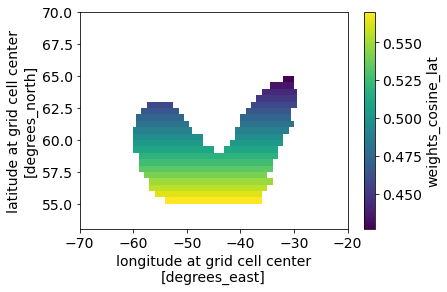

In [23]:
# sanity check - plot weights to compare to area plot above
weights.sel(longitude=slice(-70,-20),latitude=slice(53,70)).plot();

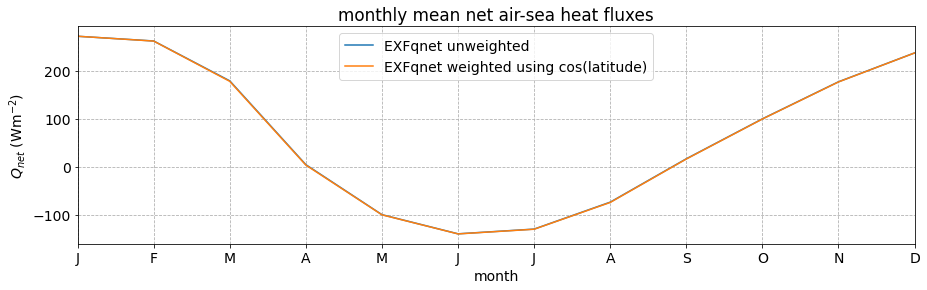

In [24]:
plt.rcParams['font.size'] = '14'
plt.figure(figsize=[15,4])
EXFqnet_gyre_mean_month_unweighted.plot(label="EXFqnet unweighted")
EXFqnet_gyre_mean_month_weighted_v2.plot(label="EXFqnet weighted using cos(latitude)")

# plt.title("monthly mean air-sea heat flux")
plt.title("")
plt.ylabel("$Q_{net}$ (Wm$^{-2}$)")
plt.legend()
plt.xticks(ticks=list(range(13)[1:]), labels=['J','F','M','A','M','J','J','A','S','O','N','D'])
plt.margins(x=0)

plt.grid(linestyle='--')
plt.title("monthly mean net air-sea heat fluxes");

In [26]:
# see what the difference is
diff = EXFqnet_gyre_mean_month_weighted_v2.values - EXFqnet_gyre_mean_month_unweighted.values
diff

array([ 0.04984994, -0.20747532, -1.04593988, -0.88649992, -0.35251749,
       -0.21159223, -0.27771832, -0.61258979, -0.50697344, -0.39143787,
       -0.34296701, -0.10364284])

In [27]:
# double check to see both approaches yield the same result
np.all(EXFqnet_gyre_mean_month_weighted.round(3) == EXFqnet_gyre_mean_month_weighted_v2.round(3)).values

array(True)

##### Option 3: Use `weighted` function in xarray

From https://docs.xarray.dev/en/stable/examples/area_weighted_temperature.html

In [28]:
# cos(lat) is proportional to grid cell area
cos_lat_da = np.cos(np.deg2rad(EXFqnet_gyre.latitude))

EXFqnet_gyre_weighted = EXFqnet_gyre.weighted(cos_lat_da)
EXFqnet_gyre_weighted

DataArrayWeighted with weights along dimensions: latitude

In [29]:
# take mean 
# (sidebar: 'DataArrayWeighted' object has no attribute 'groupby' - so you need to group by month after taking the mean)
EXFqnet_gyre_mean_weighted_v3 = EXFqnet_gyre_weighted.mean(['latitude','longitude'])

In [31]:
EXFqnet_gyre_mean_month_weighted_v3 = EXFqnet_gyre_mean_weighted_v3.groupby('time.month').mean()

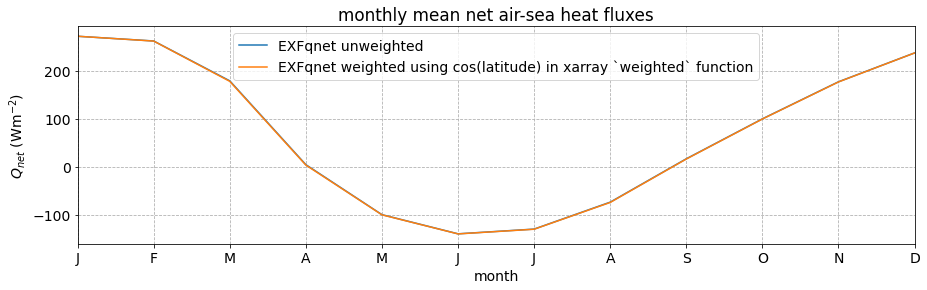

In [32]:
plt.rcParams['font.size'] = '14'
plt.figure(figsize=[15,4])
EXFqnet_gyre_mean_month_unweighted.plot(label="EXFqnet unweighted")
EXFqnet_gyre_mean_month_weighted_v3.plot(label="EXFqnet weighted using cos(latitude) in xarray `weighted` function")

# plt.title("monthly mean air-sea heat flux")
plt.title("")
plt.ylabel("$Q_{net}$ (Wm$^{-2}$)")
plt.legend()
plt.xticks(ticks=list(range(13)[1:]), labels=['J','F','M','A','M','J','J','A','S','O','N','D'])
plt.margins(x=0)

plt.grid(linestyle='--')
plt.title("monthly mean net air-sea heat fluxes");

In [33]:
# double check to see both approaches yield the same result
np.all(EXFqnet_gyre_mean_month_weighted.round(3) == EXFqnet_gyre_mean_month_weighted_v3.round(3)).values

array(True)

#### Print summary of mean monthly air-sea heat fluxes

In [35]:
print(f"The monthly net air-sea heat fluxes (in W m^-2) over the subpolar gyre are printed below."
"\nHere, positive fluxes indicate ocean heat loss and atmosphere heat gain.")
print(f"Jan: {round(EXFqnet_gyre_mean_month_weighted.values[0])}")
print(f"Feb: {round(EXFqnet_gyre_mean_month_weighted.values[1])}")
print(f"Mar: {round(EXFqnet_gyre_mean_month_weighted.values[2])}")
print(f"Apr: {round(EXFqnet_gyre_mean_month_weighted.values[3])}")
print(f"May: {round(EXFqnet_gyre_mean_month_weighted.values[4])}")
print(f"Jun: {round(EXFqnet_gyre_mean_month_weighted.values[5])}")
print(f"Jul: {round(EXFqnet_gyre_mean_month_weighted.values[6])}")
print(f"Aug: {round(EXFqnet_gyre_mean_month_weighted.values[7])}")
print(f"Sep: {round(EXFqnet_gyre_mean_month_weighted.values[8])}")
print(f"Oct: {round(EXFqnet_gyre_mean_month_weighted.values[9])}")
print(f"Nov: {round(EXFqnet_gyre_mean_month_weighted.values[10])}")
print(f"Dec: {round(EXFqnet_gyre_mean_month_weighted.values[11])}");

The monthly net air-sea heat fluxes (in W m^-2) over the subpolar gyre are printed below.
Here, positive fluxes indicate ocean heat loss and atmosphere heat gain.
Jan: 272
Feb: 262
Mar: 178
Apr: 4
May: -100
Jun: -140
Jul: -130
Aug: -74
Sep: 16
Oct: 100
Nov: 177
Dec: 237


What we can see from the figure and the calculated means above is the greatest ocean heat loss (= positive net heat flux in the atmosphere) in the subpolar gyre occurs in winter (Dec, Jan, Feb, Mar). This is due to cold winter air temperatures and warm water (from subtropical origins) that create considerable ocean-atmosphere heat flux divergences. Heat is lost from the ocean, creating denser surface waters that sink (formation of Labrador Sea indermediate waters that flow into the upper arm of the AMOC).

Conversely, heat is gained in the ocean during summer months (May-Aug), peaking in June/July (= negative net heat flux in the atmosphere). The relative summer heat flux (gain) is smaller than the winter heat flux (loss).

#### For a visual representation of monthly net air-sea heat flux:

SIatmQnet:

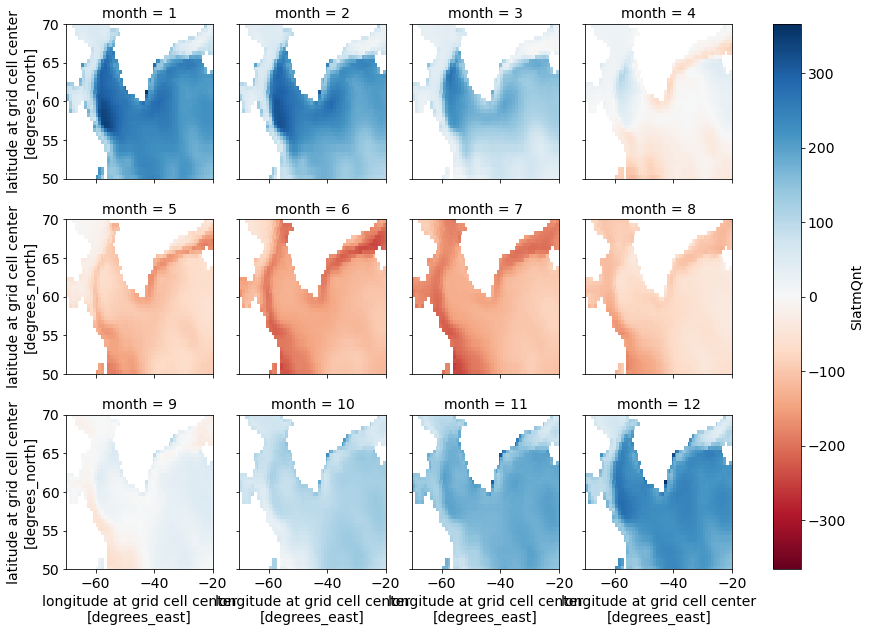

In [36]:
heat_ds.sel(latitude=slice(50,70), longitude=slice(-70,-20)).groupby("time.month").mean("time").SIatmQnt.plot(x="longitude",y="latitude",col="month",col_wrap=4,cmap='RdBu');

EXFqnet:

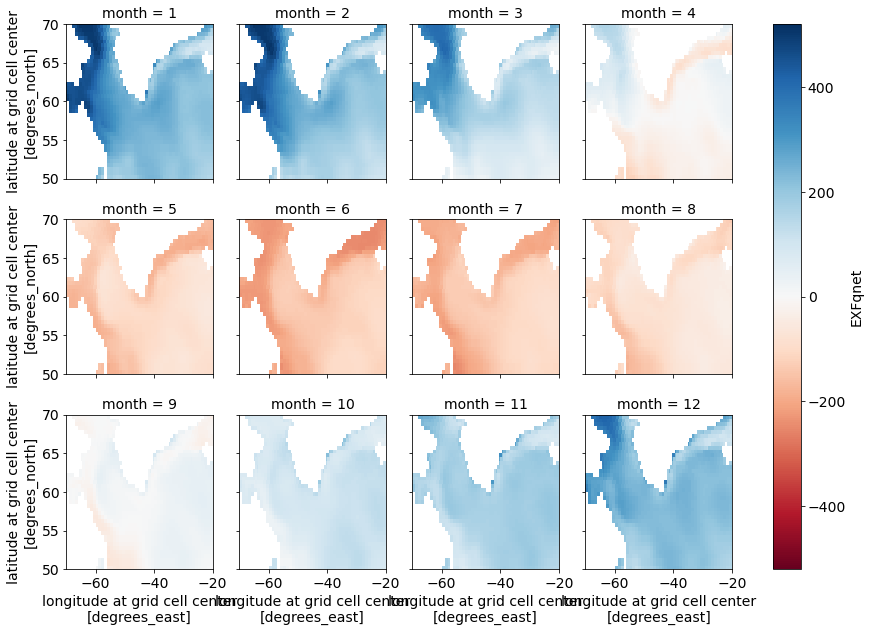

In [37]:
heat_ds.sel(latitude=slice(50,70), longitude=slice(-70,-20)).groupby("time.month").mean("time").EXFqnet.plot(x="longitude",y="latitude",col="month",col_wrap=4,cmap='RdBu');

EXFqnet in subpolar gyre:

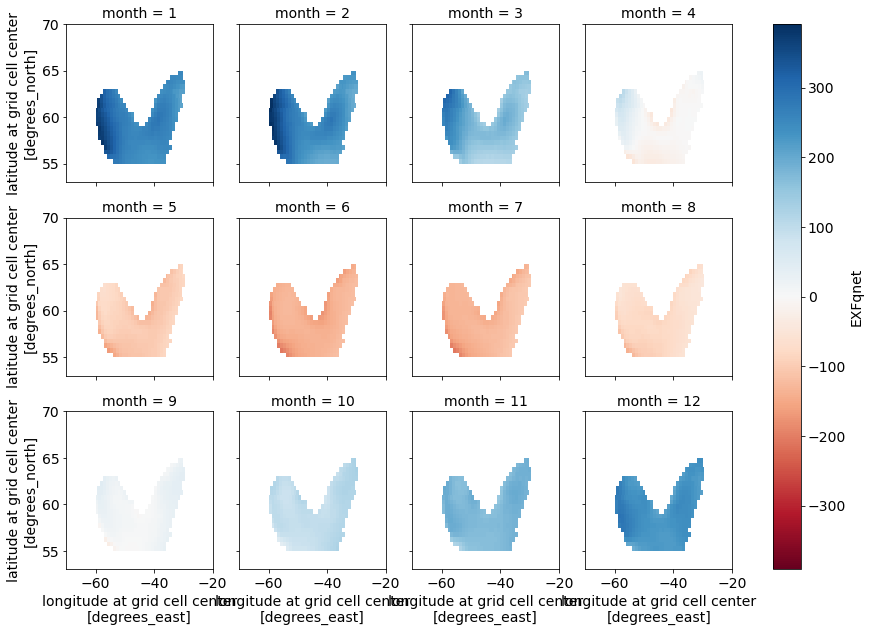

In [38]:
EXFqnet_gyre_month = EXFqnet_gyre.groupby("time.month").mean(dim=['time'])
EXFqnet_gyre_month.sel(longitude=slice(-70,-20),latitude=slice(53,70)).plot(x="longitude",y="latitude",col="month",col_wrap=4,cmap='RdBu');

***

### 3b. How have air-sea heat fluxes over the subpolar gyre deviated from these climatologies over the past few decades? Which months exhibit the largest and smallest deviations from climatology?

### Interannual variation:

##### Calculate annual winter (NDJFM) net air-sea heat flux over the Labrador Sea

Following Straneo (2006), annual mean air-sea heat fluxes are calculated from May to the following April of consecutive years. Then I grouped each winter season (November-March) and took the mean.

In [39]:
# loop through each year (May to April of consecutive years) and take the mean; then calculate only winter season (Nov-Mar) heat fluxes
years = list(range(1992, 2017, 1))
heat_year = []
heat_winter = []

for year in years:
    # subset data from May-April (including winter season) of consecutive years
    data_tmp = EXFqnet_gyre.sel(time=slice('05-'+str(year),'04-'+str(year+1)))
    # take area-weighted mean to get mean annual air-sea heat flux
    data_tmp_weighted = (data_tmp*area_gyre).sum(dim=["latitude","longitude"])/area_gyre_total
    heat_year.append(data_tmp_weighted.mean(dim=['time']).values)
    
    # subset weighted data from Nov-Mar to get winter season
    winter_tmp = data_tmp_weighted.sel(time=slice('11-'+str(year),'03-'+str(year+1))).mean(['time'])
    # assign to output
    heat_winter.append(winter_tmp.values)
    
# Create output DataArrays
annual_heat_da = xr.DataArray(heat_year, dims='start_year', coords={'start_year': years}, name='Qnet_gyre_annual')
winter_heat_da = xr.DataArray(heat_winter, dims='start_year', coords={'start_year': years}, name='Qnet_gyre_winter')

heat_avg_year = annual_heat_da.mean()
heat_avg_winter = winter_heat_da.mean()

print(f'mean annual (May-April) air-sea heat flux 1992-2017: {heat_avg_year.round(2).values} W m^-2\n')
print(annual_heat_da)
print(f'\n\nmean winter (Nov-Mar) air-sea heat flux 1992-2017: {heat_avg_winter.round(2).values} W m^-2\n')
print(winter_heat_da)

mean annual (May-April) air-sea heat flux 1992-2017: 66.44 W m^-2

<xarray.DataArray 'Qnet_gyre_annual' (start_year: 25)>
array([97.43365943, 88.44726749, 78.12277465, 26.56268603, 76.10171086,
       58.77214605, 76.36156435, 83.55163382, 64.67058114, 80.54979887,
       64.50765794, 58.92994849, 71.07752912, 57.1209944 , 55.95712224,
       82.13882638, 56.74925864, 29.2674347 , 58.7866094 , 75.80580357,
       35.24966231, 67.48184906, 82.73616926, 68.22205025, 66.5186949 ])
Coordinates:
  * start_year  (start_year) int32 1992 1993 1994 1995 ... 2013 2014 2015 2016


mean winter (Nov-Mar) air-sea heat flux 1992-2017: 224.83 W m^-2

<xarray.DataArray 'Qnet_gyre_winter' (start_year: 25)>
array([302.96020734, 292.33229291, 278.63559662, 147.6715944 ,
       241.60664696, 217.29177969, 242.24969922, 258.64126033,
       205.85495577, 247.7311358 , 211.79820883, 217.19730775,
       242.65953718, 200.72937566, 211.69056355, 260.57720131,
       198.90764974, 138.63073899, 199.72819129, 2

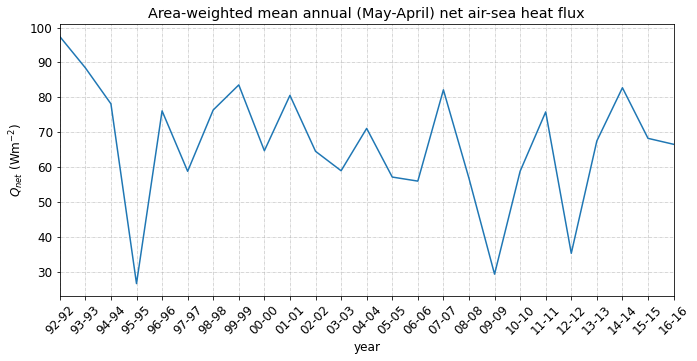

In [43]:
# plot annual mean heat flux
yrs = pd.period_range(np.datetime64('1992'), freq='Y', periods=25).strftime('%Y').tolist()

plt.figure(figsize=[11, 5])
plt.rcParams['font.size'] = '12'

annual_heat_da.plot()

# ticks
year_span = []
for year in winter_heat_da.start_year:
    year_span.append(str(year.values)[-2:]+'-'+str(year.values+1)[-2:])

plt.margins(x=0)
plt.grid(linestyle='-.', linewidth=0.5)
plt.ylabel("$Q_{net}$ (Wm$^{-2}$)")
plt.xticks(ticks=annual_heat_da.start_year, labels=year_span, rotation=45)
plt.xlabel("year")

plt.title("Area-weighted mean annual (May-April) net air-sea heat flux");

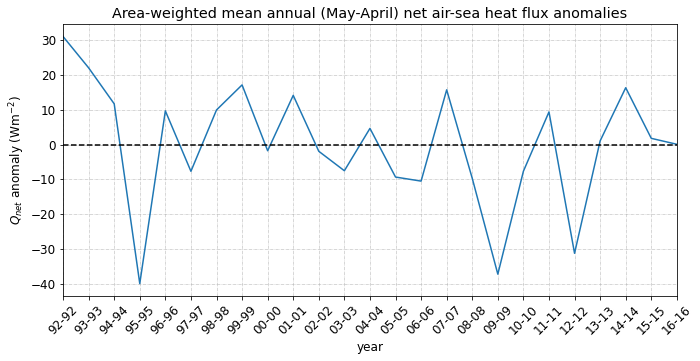

In [44]:
# plot annual mean heat flux anomalies
yrs = pd.period_range(np.datetime64('1992'), freq='Y', periods=25).strftime('%Y').tolist()

plt.figure(figsize=[11, 5])
plt.rcParams['font.size'] = '12'

(annual_heat_da-heat_avg_year).plot()

plt.margins(x=0)
plt.grid(linestyle='-.', linewidth=0.5)
plt.ylabel("$Q_{net}$ anomaly (Wm$^{-2}$)")
plt.xticks(ticks=annual_heat_da.start_year, labels=year_span, rotation=45)
plt.axhline(y=0, color='k', linestyle='--')
plt.xlabel("year")

plt.title("Area-weighted mean annual (May-April) net air-sea heat flux anomalies");

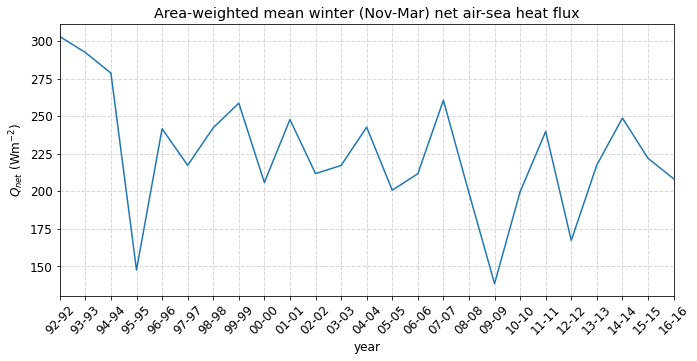

In [45]:
# plot winter mean heat flux
yrs = pd.period_range(np.datetime64('1992'), freq='Y', periods=25).strftime('%Y').tolist()

plt.figure(figsize=[11, 5])
plt.rcParams['font.size'] = '12'

winter_heat_da.plot()

# ticks
year_span = []
for year in winter_heat_da.start_year:
    year_span.append(str(year.values)[-2:]+'-'+str(year.values+1)[-2:])

plt.margins(x=0)
plt.grid(linestyle='-.', linewidth=0.5)
plt.ylabel("$Q_{net}$ (Wm$^{-2}$)")
plt.xticks(ticks=winter_heat_da.start_year, labels=year_span, rotation=45)
plt.xlabel("year")

plt.title("Area-weighted mean winter (Nov-Mar) net air-sea heat flux");

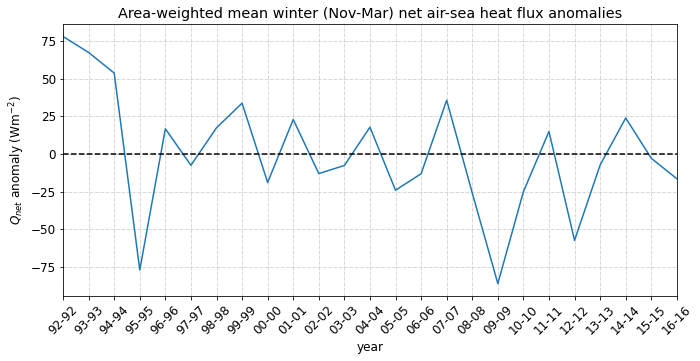

In [46]:
# plot winter mean heat flux anomalies
yrs = pd.period_range(np.datetime64('1992'), freq='Y', periods=25).strftime('%Y').tolist()

plt.figure(figsize=[11, 5])
plt.rcParams['font.size'] = '12'

(winter_heat_da-heat_avg_winter).plot()

plt.margins(x=0)
plt.grid(linestyle='-.', linewidth=0.5)
plt.ylabel("$Q_{net}$ anomaly (Wm$^{-2}$)")
plt.xticks(ticks=winter_heat_da.start_year, labels=year_span, rotation=45)
plt.axhline(y=0, color='k', linestyle='--')
plt.xlabel("year")

plt.title("Area-weighted mean winter (Nov-Mar) net air-sea heat flux anomalies");

### Monthly deviations:

Take the mean and standard deviation for each month:

In [47]:
# heat flux weighted by grid-cell area
EXFqnet_gyre_mean_weighted = (EXFqnet_gyre*area_gyre).sum(dim=["latitude","longitude"])/area_gyre_total

# now get the mean for each month from 1992-2017
EXFqnet_gyre_mean_month_weighted = EXFqnet_gyre_mean_weighted.groupby("time.month").mean(dim=["time"]) # average (same code as above)
EXFqnet_gyre_std_month_weighted = EXFqnet_gyre_mean_weighted.groupby("time.month").std(dim=["time"]) # standard dev

In [48]:
heat_months_ordered = xr.concat([EXFqnet_gyre_mean_month_weighted.sel(month=slice(5,12)),EXFqnet_gyre_mean_month_weighted.sel(month=slice(1,4))],dim='month')
heat_months_sd_ordered = xr.concat([EXFqnet_gyre_std_month_weighted.sel(month=slice(5,12)),EXFqnet_gyre_std_month_weighted.sel(month=slice(1,4))],dim='month')

In [49]:
heat_months_ordered['month'] = ['May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb','Mar','Apr']
heat_months_sd_ordered['month'] = ['May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb','Mar','Apr']

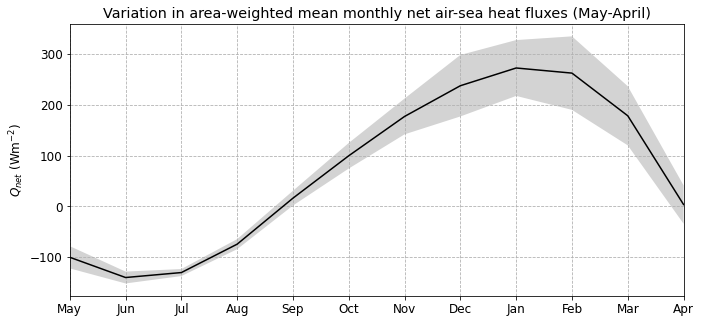

In [50]:
plt.figure(figsize=[11, 5])
plt.rcParams['font.size'] = '12'
plt.margins(x=0)

plt.plot(heat_months_ordered.month,heat_months_ordered.values, color='k')
plt.fill_between(heat_months_ordered.month, heat_months_ordered.values-heat_months_sd_ordered.values, heat_months_ordered.values+heat_months_sd_ordered.values, facecolor='lightgray', interpolate=True)

plt.ylabel("$Q_{net}$ (Wm$^{-2}$)")
# plt.xticks(ticks=heat_months_ordered.month, labels=['M','J','J','A','S','O','N','D','J','F','M','A'])
plt.grid(linestyle='--')
plt.title("Variation in area-weighted mean monthly net air-sea heat fluxes (May-April)");

Clearly, the winter months (DJFM) have the largest deviation and the summer months (JJAS) have the least variation about the mean. Spring (Apr/May) and fall (Oct/Nov) months are moderately variable.

Put simply, we can conclude that the interannual varaibility in annual net air-sea heat fluxes observed in the subpolar gyre are due to variations in the winter months.

***

### 3c. Compare the observed changes to the annual-mean subpolar ocean temperatures to those predicted by the annual-mean air-sea heat flux anomalies. Estimate how much heat lost by the ocean to the atmosphere each year was resupplied by ocean heat transport. How do variations of annual-mean heat loss to the atmosphere compare with annual-mean heat gained by ocean transport? For this question, consider the upper 2000m of the subpolar gyre.

#### Compare the observed changes to the annual-mean subpolar ocean temperatures to those predicted by the annual-mean air-sea heat flux anomalies

To do this, I will calculate the expected total ocean energy loss calculated from net air-sea winter heat fluxes (`energy_heat_flux`) and the total energy change observed from ocean temperatures (June-June) (`energy_obs_ocean`). The difference between these two values is the energy contribution from ocean transport (`energy_ocean_trans`).

I will use the following equation that relates the change in temperature of a water parcel to the change in energy:

&emsp;$\Delta E = C_p m \Delta T$

where $m$ is the mass of the water and $C_p$ is the specific heat of the sea water at constant pressure.

Therefore: <br>

&emsp;$\Delta E = C_p * \rho * v * (T - T_{ref})$

where $E$ is the total energy (in Joules) gained/lost by a water parcel with volume, $v$, and density, $\rho$, for a given temperature change ($T - T_{ref}$)

* Total energy is in Joules; heat flux (rate) is in W m^(-2)
* The specific heat capacity means that ~4,000 joules of energy are required to heat 1.0 kilogram of sea water by 1.0°C 

To do this calculation, we need the geometry ECCO data to obtain area and volume of region: <br>
* variable `drF`: cell_thickness. distance between the upper and lower interfaces of the model grid cell (units: m) <br>
* variable `area`: area of lat-lon grid cell (units: m^2)

#### First need to get the volume and area of the subpolar gyre

In [51]:
# first need to create mask for the subpolar gyre (using 3 dimensions)
# select data from grid cells with a depth of 2000m or deeper
theta_below_2000 = temp_salt_ds.THETA.where(geometry_ds.Depth>2000)

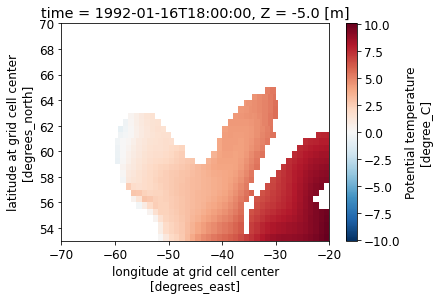

In [52]:
# plot to make sure I did that right
theta_below_2000.sel(longitude=slice(-70,-20),latitude=slice(53,70),time='1992-01-16',Z=-5).plot();

In [53]:
# Use an existing DataArray with desired lat/lon coords and change values to mask zeros/ones
gyremask_da = ecco_depth.copy(deep=True)
gyremask_da.values = gyre_mask
gyremask_da.name = 'gyre_mask'

In [54]:
# multiply mask to theta dataset and get final output of subpolar gyre temperature data
theta_gyre = gyremask_da*theta_below_2000

# now only select 'wet' grid cells
theta_gyre_wet = theta_gyre.where(geometry_ds.maskC == True)

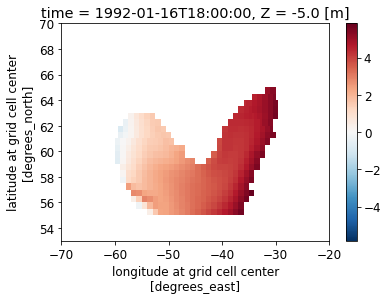

In [55]:
# plot to double check it is correct
theta_gyre_wet.sel(longitude=slice(-70,-20),latitude=slice(53,70),time='1992-01-16',Z=-5).plot();

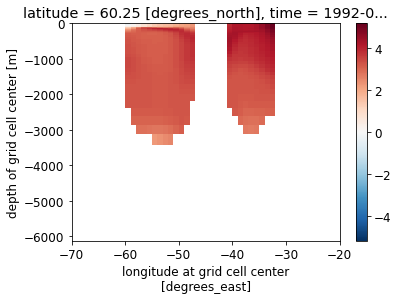

In [56]:
# sanity check plot - look at transect along 60.25 degree latitude line and make sure I only have wet cells
theta_gyre_wet.sel(latitude=60.25, longitude=slice(-70,-20),time='1992-01-16').transpose().plot();

In [57]:
# we are only considering the upper 2000 for these calculations
theta_gyre_wet_2000m = theta_gyre_wet.sel(Z=slice(0,-2000))

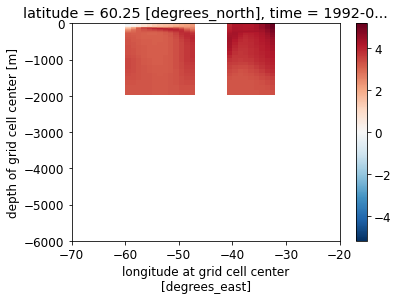

In [58]:
# sanity check plot - look at new slice
theta_gyre_wet_2000m.sel(latitude=60.25, longitude=slice(-70,-20),time='1992-01-16').transpose().plot()
plt.ylim(-6000,0);

#### Now that we have the volume and area of the subpolar gyre, we can calculate mean ocean temperature and surface heat fluxes weighted by volume and area, respectively

In [61]:
# first calculate volume of grid cells in subpolar gyre
gridcell_volume = geometry_ds.drF*geometry_ds.area*geometry_ds.hFacC # calculate volume of each grid cell
gyre_volume_cells = gridcell_volume.where(geometry_ds.Depth>2000)*gyremask_da # mask subpolar gyre volume gridcells

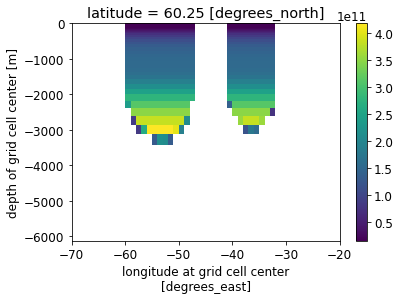

In [62]:
# sanity check plot for calculated volume of cells
gyre_volume_cells.sel(latitude=60.25, longitude=slice(-70,-20)).plot();

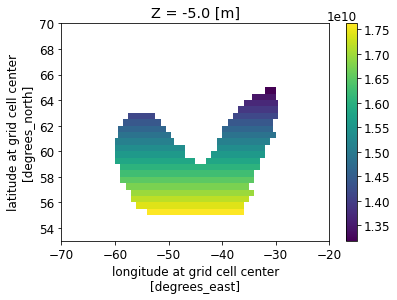

In [63]:
gyre_volume_cells.sel(Z=-5,longitude=slice(-70,-20),latitude=slice(53,70)).plot();

BUT we only need the volume of the upper 2000 meters

In [64]:
gyre_volume_2000m = gyre_volume_cells.sel(Z=slice(0,-2000))
gyre_volume_2000m_total = gyre_volume_2000m.sum(dim=['Z','latitude','longitude'])

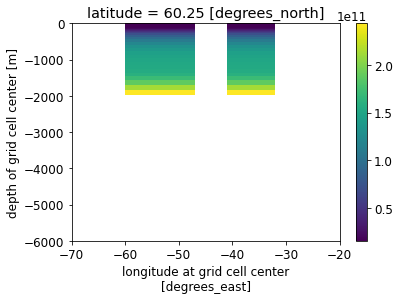

In [65]:
# sanity check plot for calculated volume of cells
gyre_volume_2000m.sel(latitude=60.25, longitude=slice(-70,-20)).plot()
plt.ylim(-6000,0);

In [93]:
# plot area-weighted temperature profile for each month
theta_gyre_wet_2000m_area_weighted = (theta_gyre_wet_2000m*area_gyre).sum(dim=['latitude','longitude'])/area_gyre_total
theta_gyre_wet_2000m_area_weighted

<xarray.DataArray (time: 312, Z: 37)>
dask.array<truediv, shape=(312, 37), dtype=float64, chunksize=(1, 37), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1992-01-16T18:00:00 ... 2017-12-16T06:00:00
  * Z        (Z) float32 -5.0 -15.0 -25.0 ... -1.634e+03 -1.765e+03 -1.914e+03

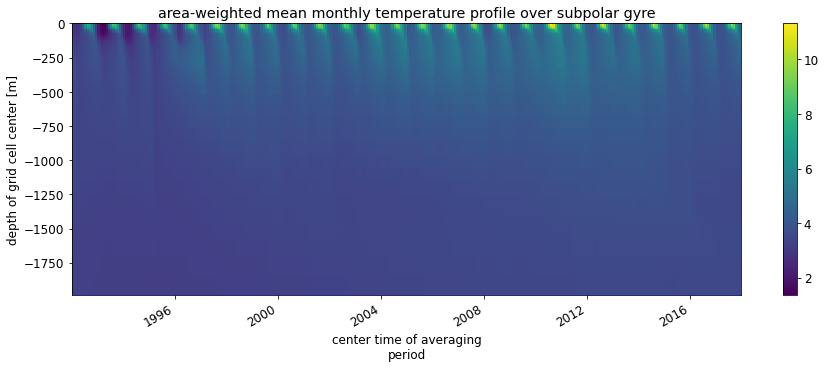

In [94]:
theta_gyre_wet_2000m_area_weighted.transpose().plot(figsize=[15,5]);
plt.title('area-weighted mean monthly temperature profile over subpolar gyre');

Can see seasonal cycle of surface warming and cooling each year. Waters below ~750m tend to be roughly the same temperature.

In [66]:
# calculate the observed temperature difference (June to June) before and after winter season (successive years)

# first take volume-weighted mean temperature of the upper 2000 m of the subpolar gyre
theta_gyre_wet_2000m_weighted = (theta_gyre_wet_2000m*gyre_volume_2000m).sum(dim=['Z','latitude','longitude'])/gyre_volume_2000m_total

# setup for loop
years = list(range(1992, 2017, 1))
temp_diff = [] # temp difference
temp = [] # observed mean temp

# loop to extract difference in mean temp between consecutive years
for year in years:
    # subset observed monthly temperature in June for 2 years and take difference
    year1 = theta_gyre_wet_2000m_weighted.sel(time=str(year)+'-06')
    year2 = theta_gyre_wet_2000m_weighted.sel(time=str(year+1)+'-06')
    diff = (year2.values - year1.values) # a negative difference indicates temperature loss over winter season
    
    # assign to final outputs
    temp_diff.append(np.array(diff[0]))
    temp.append(year1.values[0])
    if year == 2016: temp.append(year2.values[0])

# create output DataArray
summer_temp_diff_da = xr.DataArray(temp_diff, dims="start_year", coords={"start_year": years}, name='summer_temp_difference')
temp_da = xr.DataArray(temp, dims="year", coords={"year": list(range(1992, 2018, 1))}, name='observed_temp_summer')

# summer_temp_diff['temp_diff'] = temp_diff
print(summer_temp_diff_da)
print('\n')
print(temp_da)

<xarray.DataArray 'summer_temp_difference' (start_year: 25)>
array([-0.06715813,  0.02758745,  0.02173266,  0.23344795,  0.03591746,
        0.11495627, -0.02076597, -0.06927779,  0.08141388, -0.06305305,
        0.10726549,  0.09893327,  0.02552159,  0.0414102 ,  0.03534934,
       -0.04986217, -0.03176123,  0.18800789,  0.01153692, -0.10274912,
        0.04336377, -0.03650077, -0.16400884, -0.04426618, -0.05929602])
Coordinates:
  * start_year  (start_year) int32 1992 1993 1994 1995 ... 2013 2014 2015 2016


<xarray.DataArray 'observed_temp_summer' (year: 26)>
array([3.37801201, 3.31085388, 3.33844133, 3.36017399, 3.59362195,
       3.62953941, 3.74449568, 3.72372971, 3.65445192, 3.73586579,
       3.67281274, 3.78007823, 3.8790115 , 3.90453309, 3.94594329,
       3.98129263, 3.93143046, 3.89966923, 4.08767712, 4.09921405,
       3.99646492, 4.03982869, 4.00332792, 3.83931908, 3.7950529 ,
       3.73575688])
Coordinates:
  * year     (year) int32 1992 1993 1994 1995 1996 ... 2013 201

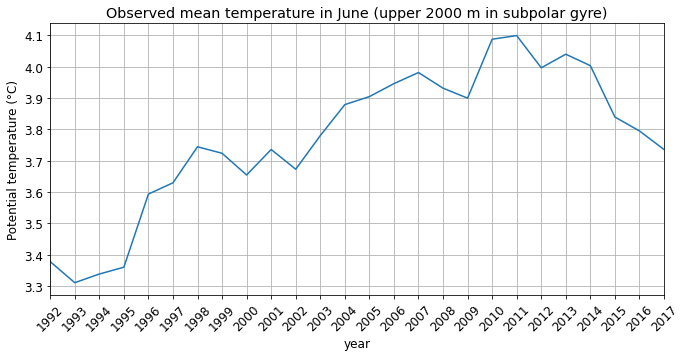

In [67]:
plt.figure(figsize=[11, 5])
plt.rcParams['font.size'] = '12'

temp_da.plot()
plt.xticks(ticks=list(range(1992, 2018, 1)), rotation=45)
plt.margins(x=0)
plt.title("Observed mean temperature in June (upper 2000 m in subpolar gyre)")
plt.ylabel("Potential temperature (°C)")
plt.grid();

Detrend the observed temperature data and then plot again

In [68]:
def detrend_dim(da, dim, deg=1):
    # detrend along a single dimension
    p = da.polyfit(dim=dim, deg=deg)
    fit = xr.polyval(da[dim], p.polyfit_coefficients)
    return da - fit

In [69]:
temp_da_detrended = detrend_dim(temp_da,'year')
temp_da_detrended

<xarray.DataArray (year: 26)>
array([-0.09370272, -0.18484859, -0.18124888, -0.18350396,  0.02595626,
        0.03788598,  0.12885451,  0.0841008 , -0.00916473,  0.04826141,
       -0.03877939,  0.04449837,  0.11944389,  0.12097774,  0.13840021,
        0.14976181,  0.07591189,  0.02016292,  0.18418307,  0.17173226,
        0.0449954 ,  0.06437142,  0.00388292, -0.18411366, -0.25236759,
       -0.33565135])
Coordinates:
  * year     (year) int32 1992 1993 1994 1995 1996 ... 2013 2014 2015 2016 2017

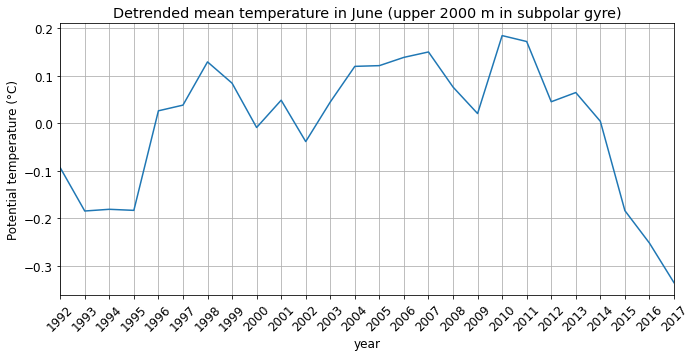

In [70]:
plt.figure(figsize=[11, 5])
plt.rcParams['font.size'] = '12'

temp_da_detrended.plot()
plt.xticks(ticks=list(range(1992, 2018, 1)), rotation=45)
plt.margins(x=0)
plt.title("Detrended mean temperature in June (upper 2000 m in subpolar gyre)")
plt.ylabel("Potential temperature (°C)")
plt.grid();

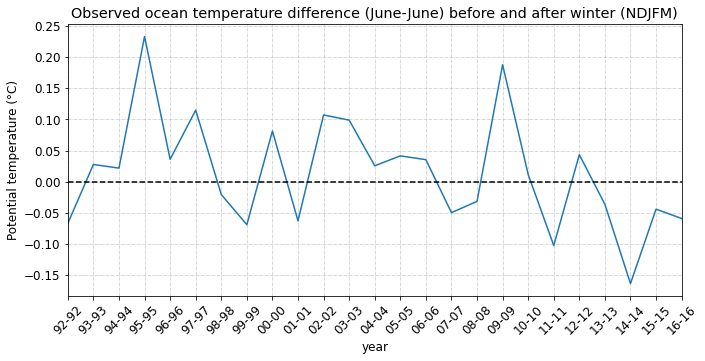

In [71]:
# plot temperature difference before/after winter heat loss
plt.figure(figsize=[11, 5])
plt.rcParams['font.size'] = '12'

summer_temp_diff_da.plot()

# ticks
year_span = []
for year in winter_heat_da.start_year:
    year_span.append(str(year.values)[-2:]+'-'+str(year.values+1)[-2:])

plt.margins(x=0)
plt.grid(linestyle='-.', linewidth=0.5)
plt.ylabel("Potential temperature (°C)")
plt.xticks(ticks=winter_heat_da.start_year, labels=year_span, rotation=45)
plt.axhline(y=0, color='k', linestyle='--')
plt.xlabel("year")

plt.title("Observed ocean temperature difference (June-June) before and after winter (NDJFM)");

Calculate predicted temperature change based on winter mean heat flux

In [72]:
# determine total energy in Joules per year in ocean heat loss (winter season)
# Joules = heat flux (W m^(-2)) * Area (m^2) * time (s); 1 W = 1 J/s
energy_heat_flux = winter_heat_da * area_gyre_total * 3.16e7 # 3e7 seconds in 1 year reflecting annual cycle

In [73]:
# now use relationship of energy and temperature to calculate expected delta T
# E = (specific heat)*density*volume*(delta T), so
# delta T = E/((specific heat)*density*volume)
delta_T_exp = energy_heat_flux/(4000*1035*gyre_volume_2000m_total)

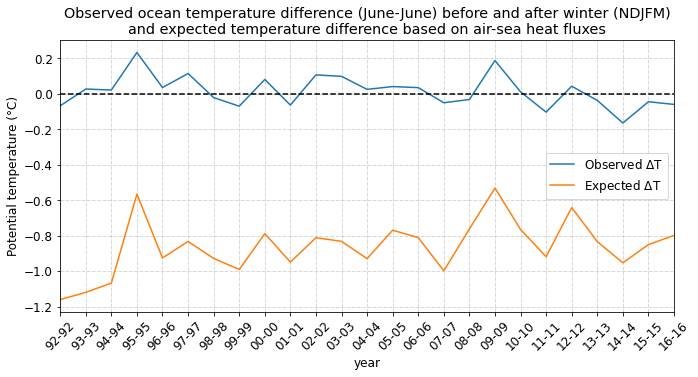

In [74]:
# plot observed temperature difference before/after winter heat loss and expected temp change based on heat fluxes
plt.figure(figsize=[11, 5])
plt.rcParams['font.size'] = '12'

summer_temp_diff_da.plot(label="Observed $\Delta$T")
# need to reverse sign of delta_T_exp because we want positive to indicate ocean temperature increase and negative to be ocean temp decrease
(delta_T_exp*(-1)).plot(label="Expected $\Delta$T")

plt.margins(x=0)
plt.grid(linestyle='-.', linewidth=0.5)
plt.ylabel("Potential temperature (°C)")
plt.xticks(ticks=winter_heat_da.start_year, labels=year_span, rotation=45)
plt.axhline(y=0, color='k', linestyle='--')
plt.legend()
plt.xlabel("year")

plt.title("Observed ocean temperature difference (June-June) before and after winter (NDJFM)\nand expected temperature difference based on air-sea heat fluxes");

The expected $\Delta$T is more negative because the air-sea heat fluxes predict larger temperature decreases (cooling) than were actually observed. Ocean transport supplies heat to the Labrador sea resulting in a smaller observed temperature difference relative to those estimated based on heat flux alone.

#### Estimate how much heat lost by the ocean to the atmosphere was resupplied by ocean heat transport

In [75]:
# E = (specific heat)*density*volume*(delta T)
energy_obs_ocean = 4000*1035*gyre_volume_2000m_total*summer_temp_diff_da

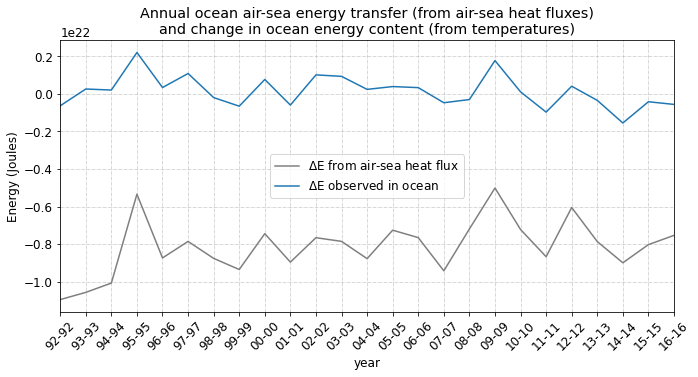

In [77]:
plt.figure(figsize=[11, 5])
plt.rcParams['font.size'] = '12'

# multiply energy_heat_flux by -1 because we want positive to indicate ocean heat loss to be consistent with observed delta E from ocean temps
(energy_heat_flux*(-1)).plot(color='tab:gray',label="$\Delta$E from air-sea heat flux")
energy_obs_ocean.plot(color='tab:blue',label="$\Delta$E observed in ocean")

plt.margins(x=0)
plt.ylabel("Energy (Joules)",fontsize=12)
plt.xticks(ticks=winter_heat_da.start_year, labels=year_span, rotation=45)
plt.grid(linestyle='-.', linewidth=0.5)
plt.legend()
plt.xlabel("year")
plt.title("Annual ocean air-sea energy transfer (from air-sea heat fluxes)\nand change in ocean energy content (from temperatures)")

plt.show()

The difference between $\Delta$E from air-sea heat flux and $\Delta$E from ocean observations will give us the energy supplied from ocean transport. Ocean transport, therefore, accounts for a ~2 degree temperature difference between the expected and observed.

In [78]:
energy_ocean_trans = energy_obs_ocean - energy_heat_flux*(-1)

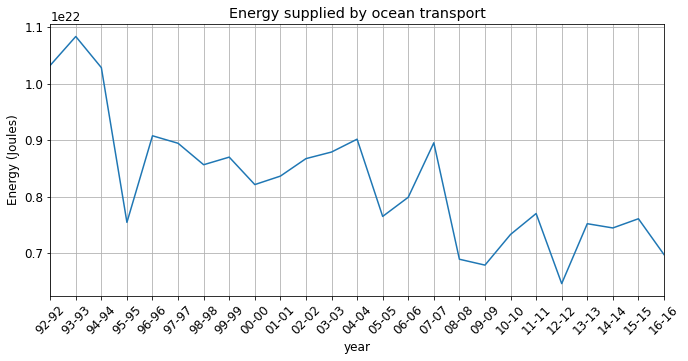

In [80]:
plt.figure(figsize=[11, 5])
plt.rcParams['font.size'] = '12'

energy_ocean_trans.plot()

plt.ylabel("Energy (Joules)",fontsize=12)
plt.margins(x=0)
plt.xticks(ticks=winter_heat_da.start_year, labels=year_span, rotation=45)
plt.xlabel("year")
plt.grid()
plt.title("Energy supplied by ocean transport");

#### How do variations of annual-mean heat loss to the atmosphere compare with annual-mean heat gained by ocean transport?

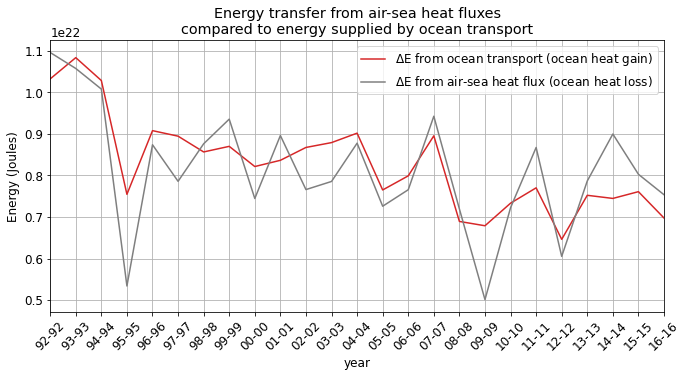

In [82]:
plt.figure(figsize=[11, 5])
plt.rcParams['font.size'] = '12'

energy_ocean_trans.plot(color='tab:red',label="$\Delta$E from ocean transport (ocean heat gain)")
energy_heat_flux.plot(color='tab:gray',label="$\Delta$E from air-sea heat flux (ocean heat loss)")

plt.ylabel("Energy (Joules)",fontsize=12)
plt.margins(x=0)
plt.xticks(ticks=winter_heat_da.start_year, labels=year_span, rotation=45)
plt.grid()
plt.legend()
plt.xlabel("year")
plt.title("Energy transfer from air-sea heat fluxes\ncompared to energy supplied by ocean transport");

Detrend both lines and then plot again.

In [83]:
# detrend
energy_ocean_trans_detrended = detrend_dim(energy_ocean_trans,'start_year')

In [84]:
# detrend
energy_heat_flux_detrended = detrend_dim(energy_heat_flux,'start_year')

In [85]:
# calculate standard deviation using detrended values
energy_ocean_trans_detrended.std().values

array(6.83108155e+20)

In [86]:
energy_heat_flux_detrended.std().values

array(1.28502675e+21)

The variance in $\Delta$E from ocean transport is much smaller than the variance in $\Delta$E from air-sea heat fluxes

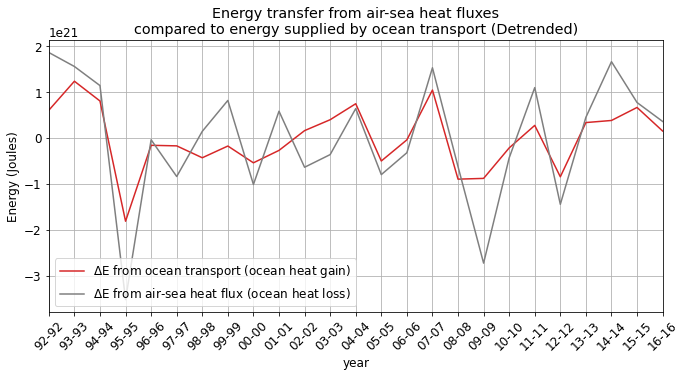

In [88]:
plt.figure(figsize=[11, 5])
plt.rcParams['font.size'] = '12'

energy_ocean_trans_detrended.plot(color='tab:red',label="$\Delta$E from ocean transport (ocean heat gain)")
energy_heat_flux_detrended.plot(color='tab:gray',label="$\Delta$E from air-sea heat flux (ocean heat loss)")

plt.ylabel("Energy (Joules)",fontsize=12)
plt.margins(x=0)
plt.xticks(ticks=winter_heat_da.start_year, labels=year_span, rotation=45)
plt.grid()
plt.legend()
plt.xlabel("year")
plt.title("Energy transfer from air-sea heat fluxes\ncompared to energy supplied by ocean transport (Detrended)");

Energy lost to the atmosphere closely compares with energy supplied by ocean transport (same order of magnitude but different signs). But, they are not perflectly balanced. If they were balanced, there would be no observed ocean temperature difference between years.

When there is more heat gain from ocean transport than heat loss from air-sea heat fluxes (= red line above gray line above), the subpolar gyre warms. There is more extreme variation in energy changes due to air-sea heat fluxes than from ocean transport (i.e., ocean transport does not exhibit as much erratic interannual variation as those observed from air-sea heat fluxes).

***

### References

Marshall, J., F. Dobson, K. Moore, P. Rhines, M. Visbeck, E. D’Asaro, K. Bumke, S. Chang, R. Davis, K. Fischer, R. Garwood, P. Guest, R. Harcourt, C. Herbaut, T. Holt, J. Lazier, S. Legg, J. McWilliams, R. Pickart, M. Prater, I. Renfrew, F. Schott, U. Send, and W. Smethie. 1998. The Labrador Sea Deep Convection Experiment. Bulletin of the American Meteorological Society, 79(10):2033–2058, [https://doi.org/https://doi.org/10.1175/1520-0477(1998)079<2033:TLSDCE>2.0.CO;2](https://doi.org/https://doi.org/10.1175/1520-0477(1998)079<2033:TLSDCE>2.0.CO;2).

Straneo, F. (2006). Heat and freshwater transport through the central Labrador Sea. Journal of Physical Oceanography, 36, 606–628. https://doi.org/10.1175/JPO2875.1

Våge, K., R. S. Pickart, V. Thierry, G. Reverdin, C. M. Lee, B. Petrie, T. A. Agnew, A. Wong, and M. H. Ribergaard. 2009. Surprising return of deep convection to the subpolar North Atlantic Ocean in winter 2007-2008. Nature Geoscience, 2:67–72, https://doi.org/10.1038/ngeo382.

***